In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols # for n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # for n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
## Loading the dataset csv file

In [3]:
df=pd.read_csv('diet.csv')

In [4]:
## Checking the top 5 records
df.head()

,gender,diet,preweight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


In [5]:
## Checking the shape and information of the dataframe
df.shape

(78, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        78 non-null     object 
 1   diet          78 non-null     object 
 2   preweight     78 non-null     int64  
 3   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


In [7]:
## Checking the summary of the dataframe
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


In [10]:
## Checking distinct values of Diet
df.diet.value_counts()

diet
B    27
C    27
A    24
Name: count, dtype: int64

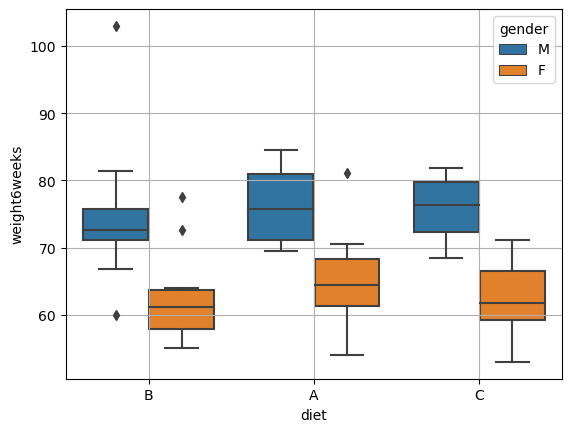

In [11]:
sns.boxplot(x="diet",y="weight6weeks", data=df, hue='gender')
plt.grid()
plt.show()

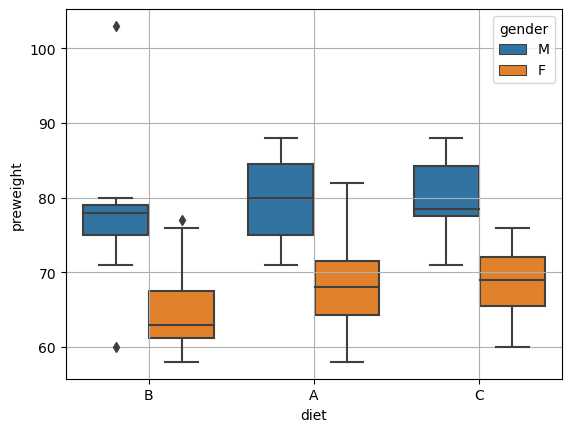

In [12]:
sns.boxplot(x="diet", y="preweight", data=df, hue='gender')
plt.grid()
plt.show()

In [13]:
## Looking at above boxplot of preweight and weight6weeeks, we can observe that there is 
#change in the wiights

## Formulate the hypothesis of the one-way ANOVA of 'gender' variable with the 'weight6weeks' variable

H0
 : The means of 'weight6weeks' variable with respect to each gender is equal.

H1
 : At least one of the means of 'weight6weeks' variable with respect to each gender is unequal.

## One-way ANOVA with the 'gender' variable.

In [14]:
formula = 'weight6weeks ~ C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  66.162186  6.097209e-12
Residual   76.0  3278.599601    43.139468        NaN           NaN


Since the p value in this scenario is less than α
 (0.05), we can say that we reject the Null Hypothesis (H0
)

## Formulate the hypothesis of the One-way ANOVA of 'Diet' variable with the 'weight6weeks' variable.

H0
 : The means of 'weight6weeks' variable with respect to each diet category is equal.

H1
 : At least one of the means of 'weight6weeks' variable with respect to each diet category is unequal.

## One-way ANOVA with the 'Diet' variable.

In [16]:
formula = 'weight6weeks ~ C(diet)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df       sum_sq    mean_sq         F    PR(>F)
C(diet)    2.0    29.841339  14.920670  0.183362  0.832839
Residual  75.0  6102.959815  81.372798       NaN       NaN


Since the p value in this scenario is greater than α
 (0.05), we can say that we fail to reject the Null Hypothesis (H0
).

### Formulate the hypothesis of ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.


H0
 : The means of 'weight6weeks' variable with respect to each diet category and gender is equal.

H1
 : At least one of the means of 'weight6weeks' variable with respect to each diet category and gender is unequal.

### ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.


In [17]:
formula = 'weight6weeks ~ C(gender) + C(diet)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  65.765339  8.037802e-12
C(diet)     2.0    67.015520    33.507760   0.772072  4.657403e-01
Residual   74.0  3211.584082    43.399785        NaN           NaN


Considering both the factors(diet and gender), gender is a significant factor as the p value is <0.05 wheras diet is not a significant variable as p value of diet is >0.05

## Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables.

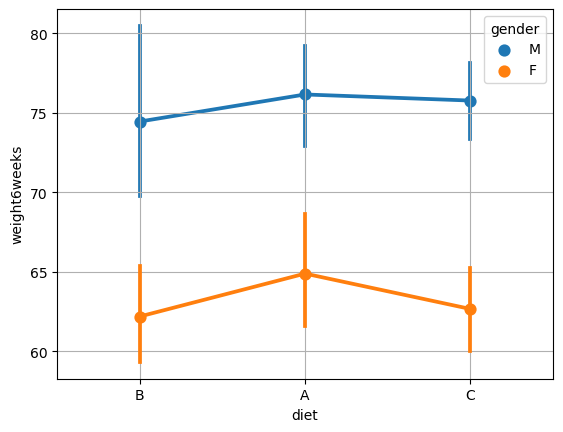

In [18]:
sns.pointplot(x = 'diet', y = 'weight6weeks', hue = 'gender', data=df)
plt.grid()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14168\2606680375.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'diet', y = 'weight6weeks', hue='gender',data=df,ci= None)


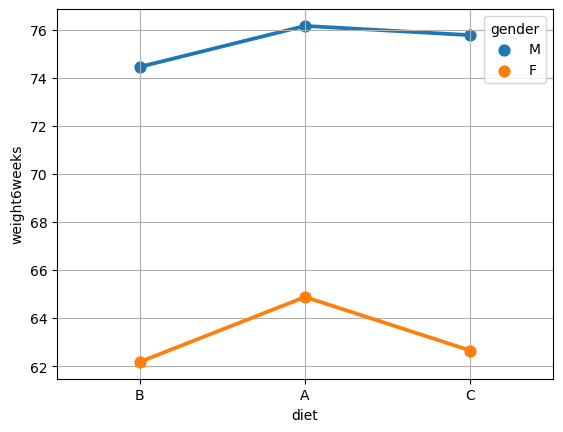

In [20]:
sns.pointplot(x = 'diet', y = 'weight6weeks', hue='gender',data=df,ci= None)
plt.grid()
plt.show()

As seen from the above two interaction plots, there seems to be very less or almost no interaction amongst the two categorical variable

In [21]:
## Interaction Effect:
model = ols('weight6weeks~C(gender)+C(diet)+C(gender):C(diet)', data=df).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df       sum_sq      mean_sq          F        PR(>F)
C(gender)           1.0  2854.201553  2854.201553  64.198902  1.453627e-11
C(diet)             2.0    67.015520    33.507760   0.753682  4.743066e-01
C(gender):C(diet)   2.0    10.555631     5.277816   0.118713  8.882364e-01
Residual           72.0  3201.028451    44.458728        NaN           NaN


In [22]:
## As gender and diet interaction is 0.888 which is >0.05 , there seems to be almost 
##no statistical interaction.

In [23]:
model = ols('weight6weeks~preweight+C(gender)+C(diet)+C(gender):C(diet)',data=df).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                     df       sum_sq      mean_sq           F        PR(>F)
C(gender)           1.0  2854.201553  2854.201553  501.808855  6.501384e-34
C(diet)             2.0    67.015520    33.507760    5.891136  4.294332e-03
C(gender):C(diet)   2.0    10.555631     5.277816    0.927914  4.001185e-01
preweight           1.0  2797.192790  2797.192790  491.785911  1.218141e-33
Residual           71.0   403.835660     5.687826         NaN           NaN


preweight is a significant predictor of sales. The interaction of gender and diet has now become slightly important.